# **Top 10000 Popular Movies Dataset**

### Including libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading csv file as df

In [2]:
df = pd.read_csv('./popular_10000_movies_tmdb.csv')
#First five rows of DataFrame
df.head()

,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,758323,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,"Father Gabriele Amorth, Chief Exorcist of the ...",18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,Inspired by the actual files of Father Gabriel...
1,640146,Ant-Man and the Wasp: Quantumania,2023-02-15,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,Super-Hero partners Scott Lang and Hope van Dy...,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125,Witness the beginning of a new dynasty.
2,502356,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,"While working underground to fix a water main,...",100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,NaN
3,868759,Ghosted,2023-04-18,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,Salt-of-the-earth Cole falls head over heels f...,0,"['Skydance Media', 'Apple Studios']",0,120,Finding that special someone can be a real adv...
4,594767,Shazam! Fury of the Gods,2023-03-15,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,"Billy Batson and his foster siblings, who tran...",125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130,Oh. My. Gods.


### Shape of DataFrame

In [3]:
df.shape

(10000, 14)

### List of columns in DataFrame

In [4]:
df.columns

Index(['id', 'title', 'release_date', 'genres', 'original_language',
       'vote_average', 'vote_count', 'popularity', 'overview', 'budget',
       'production_companies', 'revenue', 'runtime', 'tagline'],
      dtype='object')

In [5]:
df['tagline'][0]

'Inspired by the actual files of Father Gabriele Amorth, Chief Exorcist of the Vatican.'

### Dropping useless columns from DataFrame

In [6]:
df.drop(['id','overview','tagline'], axis=1, inplace=True)

### List of final columns

In [7]:
df.columns

Index(['title', 'release_date', 'genres', 'original_language', 'vote_average',
       'vote_count', 'popularity', 'budget', 'production_companies', 'revenue',
       'runtime'],
      dtype='object')

### Checking for null values in DataFrame

In [8]:
df.isnull().sum()

title                    0
release_date            21
genres                   0
original_language        0
vote_average             0
vote_count               0
popularity               0
budget                   0
production_companies     0
revenue                  0
runtime                  0
dtype: int64

### Dropping rows with null values from DataFrame

In [9]:
df.dropna(axis=0, inplace=True)

### Unique languages present in "original_language" column

In [10]:
df['original_language'].unique()

array(['English', 'French', 'Dutch', 'Spanish', 'Korean', 'Japanese',
       'Finnish', 'Ukrainian', 'Norwegian', 'Estonian', 'cn', 'Polish',
       'Russian', 'German', 'Chinese', 'Italian', 'Basque', 'Thai',
       'Turkish', 'Swedish', 'Icelandic', 'Tagalog', 'Bengali', 'Arabic',
       'Tamil', 'Telugu', 'Romanian', 'Indonesian', 'Galician', 'Danish',
       'Macedonian', 'Portuguese', 'Vietnamese', 'Catalan', 'Hindi',
       'Persian', 'Hebrew', 'Serbian', 'Malayalam', 'Greek', 'Hungarian',
       'Czech', 'Norwegian Bokmal', 'xx', 'Kannada', 'Irish', 'Khmer',
       'sh', 'Dzongkha', 'Panjabi', 'Sundanese'], dtype=object)

### Rows with "xx" as original_language

In [11]:
df[df['original_language'] == 'xx']

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
6340,Barbie,1977-01-01,[],xx,2.0,1,9.890,0,[],0,10
7837,Vertigo,2016-08-10,['Drama'],xx,2.0,1,10.093,200,[],0,6


### Dropping rows with "xx" original_language

In [12]:
df = df[~(df['original_language'] == 'xx')]

### Rows with "sh" as original_language

In [13]:
df[df['original_language'] == 'sh']

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
9096,I Miss Sonia Henie,1971-01-20,"['Comedy', 'Drama']",sh,5.5,15,13.323,0,['Neoplanta Film'],0,16


### Dropping rows with "sh" original_language

In [14]:
df = df[~(df['original_language'] == 'sh')]

### No. of duplicate entries in the DataFrame

In [15]:
df.duplicated().sum()

0

### No. of movies with unique titles

In [16]:
df['title'].nunique()

9629

### No. of movies with same title

In [17]:
df['title'].duplicated().sum()

347

### Rows with duplicate movie titles

In [18]:
df[df['title'].isin(df['title'][df['title'].duplicated()])].sort_values('title')

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
9364,3:10 to Yuma,1957-08-07,"['Western', 'Drama', 'Thriller']",English,7.2,291,10.993,0,['Columbia Pictures'],0,92
5116,3:10 to Yuma,2007-09-06,['Western'],English,7.2,3131,18.967,55000000,"['Lionsgate', 'Tree Line Films', 'Relativity M...",70016220,122
2684,A Nightmare on Elm Street,2010-04-30,"['Horror', 'Mystery', 'Thriller']",English,5.5,2415,25.679,35000000,"['Platinum Dunes', 'New Line Cinema', 'Warner ...",115664037,95
1637,A Nightmare on Elm Street,1984-11-09,['Horror'],English,7.3,4430,36.600,1100000,"['New Line Cinema', 'Smart Egg Pictures', 'Med...",57000000,91
7330,A Tale of Two Sisters,2023-05-06,[],English,0.0,0,10.538,0,[],0,8
...,...,...,...,...,...,...,...,...,...,...,...
902,Wonder Woman,2017-05-30,"['Action', 'Adventure', 'Fantasy']",English,7.2,18595,54.481,149000000,"['Atlas Entertainment', 'Cruel & Unusual Films...",822854286,141
1133,Wrong Turn,2003-05-30,"['Horror', 'Thriller']",English,6.3,2307,50.411,12600000,"['DCP Wrong Turn Productions', 'Summit Enterta...",28650575,84
774,Wrong Turn,2021-01-26,"['Horror', 'Thriller', 'Drama']",English,6.0,902,59.587,0,"['Constantin Film', 'The H Collective', 'Tea S...",3777969,110
202,X,2022-03-17,"['Horror', 'Mystery', 'Thriller']",English,6.8,1918,129.629,10000000,"['A24', 'Little Lamb Productions']",14779858,106


### Rows with empty genres column

In [19]:
df[df['genres'].str.len() == 2]

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
610,Snake Beauty,1994-03-26,[],Chinese,0.0,0,61.292,0,['Ka Shing Film Production Co.'],0,88
684,Za gyakutai: Nyotai ikedori-hen,1987-07-18,[],Japanese,6.5,1,62.096,0,['Orient 21'],0,64
816,Gabriel's Inferno: Part IV,2022-03-30,[],English,5.0,2,37.269,0,[],0,0
943,Yu Pui Tsuen,1986-12-12,[],cn,4.0,4,78.229,0,[],0,93
1178,Oppressive Torture,1978-01-14,[],Japanese,4.7,3,45.046,0,['Wakamatsu Production'],0,61
...,...,...,...,...,...,...,...,...,...,...,...
8809,The Legend of Zhao Yun,2021-01-04,[],Chinese,2.0,1,9.461,0,[],0,96
8982,Russian Nymphet: Temptation,2004-11-28,[],Russian,5.3,3,16.728,0,['Eros Film'],0,35
9484,La Boheme: Breathe Umphefumlo,2015-02-05,[],English,6.7,3,11.171,0,[],0,0
9775,野浪花,1987-05-26,[],Chinese,0.0,0,8.040,0,[],0,0


### Dropping rows with empty genres column

In [20]:
df = df[~(df['genres'].str.len() == 2)]

### Rows with empty production_companies column

In [21]:
df[df['production_companies'].str.len() == 2]

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
21,Adrenaline,2022-12-15,['Action'],English,5.9,39,717.878,0,[],0,75
27,The Elderly,2023-04-21,"['Horror', 'Thriller', 'Fantasy']",Spanish,5.8,6,521.201,0,[],0,95
28,Ripper's Revenge,2023-04-03,['Horror'],English,4.9,10,523.118,0,[],0,85
36,Gangs of Lagos,2023-04-07,['Crime'],English,6.1,35,462.815,160000000,[],0,124
46,Prizefighter: The Life of Jem Belcher,2022-06-30,"['Drama', 'History']",English,6.2,122,365.065,0,[],0,107
...,...,...,...,...,...,...,...,...,...,...,...
9905,My Mother's Lovers,2020-05-29,['Drama'],Spanish,2.8,5,12.444,0,[],0,22
9924,My Brother's Wife 2,2016-08-31,"['Romance', 'Family', 'Drama']",Korean,3.5,2,10.341,0,[],0,98
9930,Zombie Fight Club,2014-10-23,"['Action', 'Horror']",Chinese,4.7,54,12.899,0,[],0,95
9975,Heart Shot,2022-02-17,"['Romance', 'Crime']",English,5.6,69,9.132,0,[],0,19


### Dropping rows with empty production_companies column

In [22]:
df = df[~(df['production_companies'].str.len() == 2)]

### Zeroes Count in Columns

In [23]:
(df == 0).sum()

title                      0
release_date               0
genres                     0
original_language          0
vote_average             130
vote_count               129
popularity                 0
budget                  4286
production_companies       0
revenue                 3986
runtime                  106
dtype: int64

### Rows with zero vote_average or vote_count or runtime values

In [24]:
df[(df['vote_average'] == 0) | (df['vote_count'] == 0) | (df['runtime'] == 0)]

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime
23,Fast X,2023-05-17,"['Action', 'Crime', 'Thriller']",English,0.0,0,732.647,340000000,"['Universal Pictures', 'Original Film', 'One R...",0,142
100,"Kiss, Kiss!",2023-04-26,"['Romance', 'Comedy']",Polish,6.9,15,361.900,0,['Lightcraft'],0,0
101,The Little Mermaid,2023-05-18,"['Adventure', 'Family', 'Fantasy', 'Romance']",English,0.0,0,220.944,0,"['Walt Disney Pictures', 'Lucamar Productions'...",0,135
128,Transformers: Rise of the Beasts,2023-06-07,"['Action', 'Adventure', 'Science Fiction']",English,0.0,0,222.430,200000000,"['Skydance Media', 'Paramount', 'di Bonaventur...",0,0
184,The Flash,2023-06-14,"['Science Fiction', 'Action', 'Adventure']",English,0.0,0,123.659,220000000,"['Warner Bros. Pictures', 'Double Dream', 'The...",0,0
...,...,...,...,...,...,...,...,...,...,...,...
9847,Divaldo: O Mensageiro da Paz,2019-09-12,['Drama'],Portuguese,8.3,59,16.640,0,"['20th Century Fox Brazil', 'CINE Cinematográf...",0,0
9889,Influencer,2023-05-18,"['Thriller', 'Horror', 'Mystery']",English,0.0,0,8.454,0,"['Octane Entertainment', 'Superchill']",0,92
9922,Mental Finger,2023-05-06,"['Comedy', 'Action']",Sundanese,0.0,0,9.660,0,['Cinemora Pictures'],0,12
9926,"Patricia, A Hidden Passion",2020-01-21,"['Drama', 'Comedy']",Spanish,6.0,33,12.780,0,['Cine Latino'],0,0


### Dropping rows with zero vote_average or vote_count or runtime values

In [25]:
df = df[~((df['vote_average'] == 0) | (df['vote_count'] == 0) | (df['runtime'] == 0))]

### Descriptive Statistics of DataFrame

In [26]:
df.describe()#include='object')

,vote_average,vote_count,popularity,budget,revenue,runtime
count,9223.000000,9223.000000,9223.000000,9.223000e+03,9.223000e+03,9223.000000
mean,6.542546,1652.788247,31.635078,2.081719e+07,6.479669e+07,103.287867
std,0.907423,2952.562540,114.867339,3.935068e+07,1.596469e+08,24.410714
min,1.000000,1.000000,7.411000,0.000000e+00,0.000000e+00,2.000000
25%,6.000000,170.000000,13.591000,0.000000e+00,0.000000e+00,91.000000
50%,6.600000,580.000000,17.619000,2.500000e+06,3.769990e+06,101.000000
75%,7.200000,1726.000000,27.182500,2.500000e+07,5.806524e+07,115.000000
max,10.000000,33633.000000,5089.969000,5.793304e+08,2.923706e+09,449.000000


### Adding profit column in DataFrame

In [27]:
df['profit'] = df['revenue'] - df['budget']

In [28]:
df.head()

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime,profit
0,The Pope's Exorcist,2023-04-05,"['Horror', 'Mystery', 'Thriller']",English,7.4,619,5089.969,18000000,"['Screen Gems', '2.0 Entertainment', 'Jesus & ...",65675816,103,47675816
1,Ant-Man and the Wasp: Quantumania,2023-02-15,"['Action', 'Adventure', 'Science Fiction']",English,6.6,2294,4665.438,200000000,"['Marvel Studios', 'Kevin Feige Productions']",464566092,125,264566092
2,The Super Mario Bros. Movie,2023-04-05,"['Animation', 'Adventure', 'Family', 'Fantasy'...",English,7.5,1861,3935.550,100000000,"['Universal Pictures', 'Illumination', 'Ninten...",1121048165,92,1021048165
3,Ghosted,2023-04-18,"['Action', 'Comedy', 'Romance']",English,7.2,652,2791.532,0,"['Skydance Media', 'Apple Studios']",0,120,0
4,Shazam! Fury of the Gods,2023-03-15,"['Action', 'Comedy', 'Fantasy', 'Adventure']",English,6.8,1510,2702.593,125000000,"['New Line Cinema', 'The Safran Company', 'DC ...",133437105,130,8437105


### Saving our DataFrame as csv file

In [29]:
df.to_csv('movies-2.csv', index=False)

### Top 10 Movies of Every Category

In [30]:
max_budget = df.sort_values('budget', ascending=False).head(10)
#max_budget
max_revenue = df.sort_values('revenue', ascending=False).head(10)
#max_revenue
max_profit = df.sort_values('profit', ascending=False).head(10)
#max_profit
max_loss = df.sort_values('profit', ascending=True).head(10)
max_loss['loss'] = -max_loss['profit']
#max_loss
max_popularity = df.sort_values('popularity', ascending=False).head(10)
#max_popularity
max_vc = df.sort_values('vote_count', ascending=False).head(10)
#max_vc
max_va = df.sort_values('vote_average', ascending=False).head(10)
#max_va

In [31]:
max_profit

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime,profit
130,Avatar,2009-12-15,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",English,7.6,29040,188.103,237000000,"['Dune Entertainment', 'Lightstorm Entertainme...",2923706026,162,2686706026
325,Avengers: Endgame,2019-04-24,"['Adventure', 'Science Fiction', 'Action']",English,8.3,23090,101.337,356000000,['Marvel Studios'],2794731755,181,2438731755
338,Titanic,1997-11-18,"['Drama', 'Romance']",English,7.9,22838,108.782,200000000,"['Paramount', '20th Century Fox', 'Lightstorm ...",2264162353,194,2064162353
5,Avatar: The Way of Water,2022-12-14,"['Science Fiction', 'Adventure', 'Action']",English,7.7,7853,2280.912,460000000,"['20th Century Studios', 'Lightstorm Entertain...",2319331580,192,1859331580
758,Star Wars: The Force Awakens,2015-12-15,"['Adventure', 'Action', 'Science Fiction', 'Fa...",English,7.3,17979,56.939,245000000,"['Lucasfilm Ltd.', 'Bad Robot']",2068223624,136,1823223624
123,Avengers: Infinity War,2018-04-25,"['Adventure', 'Action', 'Science Fiction']",English,8.3,26811,205.036,300000000,['Marvel Studios'],2046239637,149,1746239637
68,Spider-Man: No Way Home,2021-12-15,"['Action', 'Adventure', 'Science Fiction']",English,8.0,17295,262.366,200000000,"['Marvel Studios', 'Pascal Pictures', 'Columbi...",1921847111,148,1721847111
557,Jurassic World,2015-06-12,"['Action', 'Adventure', 'Science Fiction', 'Th...",English,6.7,19031,62.284,150000000,"['Amblin Entertainment', 'Universal Pictures']",1671537444,124,1521537444
561,The Lion King,2019-07-12,"['Adventure', 'Drama', 'Family', 'Animation']",English,7.1,9089,60.210,260000000,"['Walt Disney Pictures', 'Fairview Entertainme...",1663075401,118,1403075401
168,Furious 7,2015-04-01,"['Action', 'Thriller', 'Crime']",English,7.2,9693,150.018,190000000,"['Original Film', 'One Race', 'Universal Pictu...",1515341399,137,1325341399


In [32]:
max_loss

,title,release_date,genres,original_language,vote_average,vote_count,popularity,budget,production_companies,revenue,runtime,profit,loss
447,The Gray Man,2022-07-13,"['Action', 'Thriller']",English,7.0,2866,75.098,200000000,"['AGBO', 'Roth-Kirschenbaum Films', 'Stillking...",0,128,-200000000,200000000
1445,Skyfall,2012-10-24,"['Action', 'Adventure', 'Thriller']",English,7.2,14206,48.914,200000000,"['Metro-Goldwyn-Mayer', 'Eon Productions', 'Da...",0,143,-200000000,200000000
315,The Tomorrow War,2021-09-03,"['Action', 'Science Fiction', 'Adventure']",English,7.5,2501,91.254,200000000,"['Skydance Media', 'Phantom Four', 'Lit Entert...",14400000,138,-185600000,185600000
3273,Mowgli: Legend of the Jungle,2018-11-25,"['Adventure', 'Drama']",English,6.5,2329,22.402,175000000,"['The Imaginarium', 'Warner Bros. Pictures']",0,105,-175000000,175000000
139,Turning Red,2022-03-10,"['Animation', 'Family', 'Comedy', 'Fantasy']",English,7.5,4150,154.459,190000000,"['Walt Disney Pictures', 'Pixar']",18879922,100,-171120078,171120078
391,Red Notice,2021-11-04,"['Action', 'Comedy', 'Crime', 'Thriller']",English,6.8,4833,80.982,160000000,"['Flynn Picture Company', 'Seven Bucks Product...",178143,118,-159821857,159821857
2979,The Irishman,2019-11-01,"['Crime', 'Drama', 'History']",English,7.6,5998,25.102,159000000,"['Tribeca Productions', 'Sikelia Productions',...",968853,209,-158031147,158031147
298,Luca,2021-06-17,"['Animation', 'Comedy', 'Fantasy', 'Adventure'...",English,7.9,7262,86.379,200000000,"['Pixar', 'Walt Disney Pictures']",49750471,95,-150249529,150249529
3045,The Wolfman,2010-02-10,"['Horror', 'History', 'Drama', 'Thriller']",English,5.8,1771,23.579,150000000,"['Universal Pictures', 'Relativity Media', 'St...",0,102,-150000000,150000000
1774,6 Underground,2019-12-13,"['Action', 'Comedy', 'Thriller']",English,6.3,4203,33.938,150000000,"['Skydance Media', 'Bay Films']",0,128,-150000000,150000000


### Visualization of Top 10 Movies of Every Category

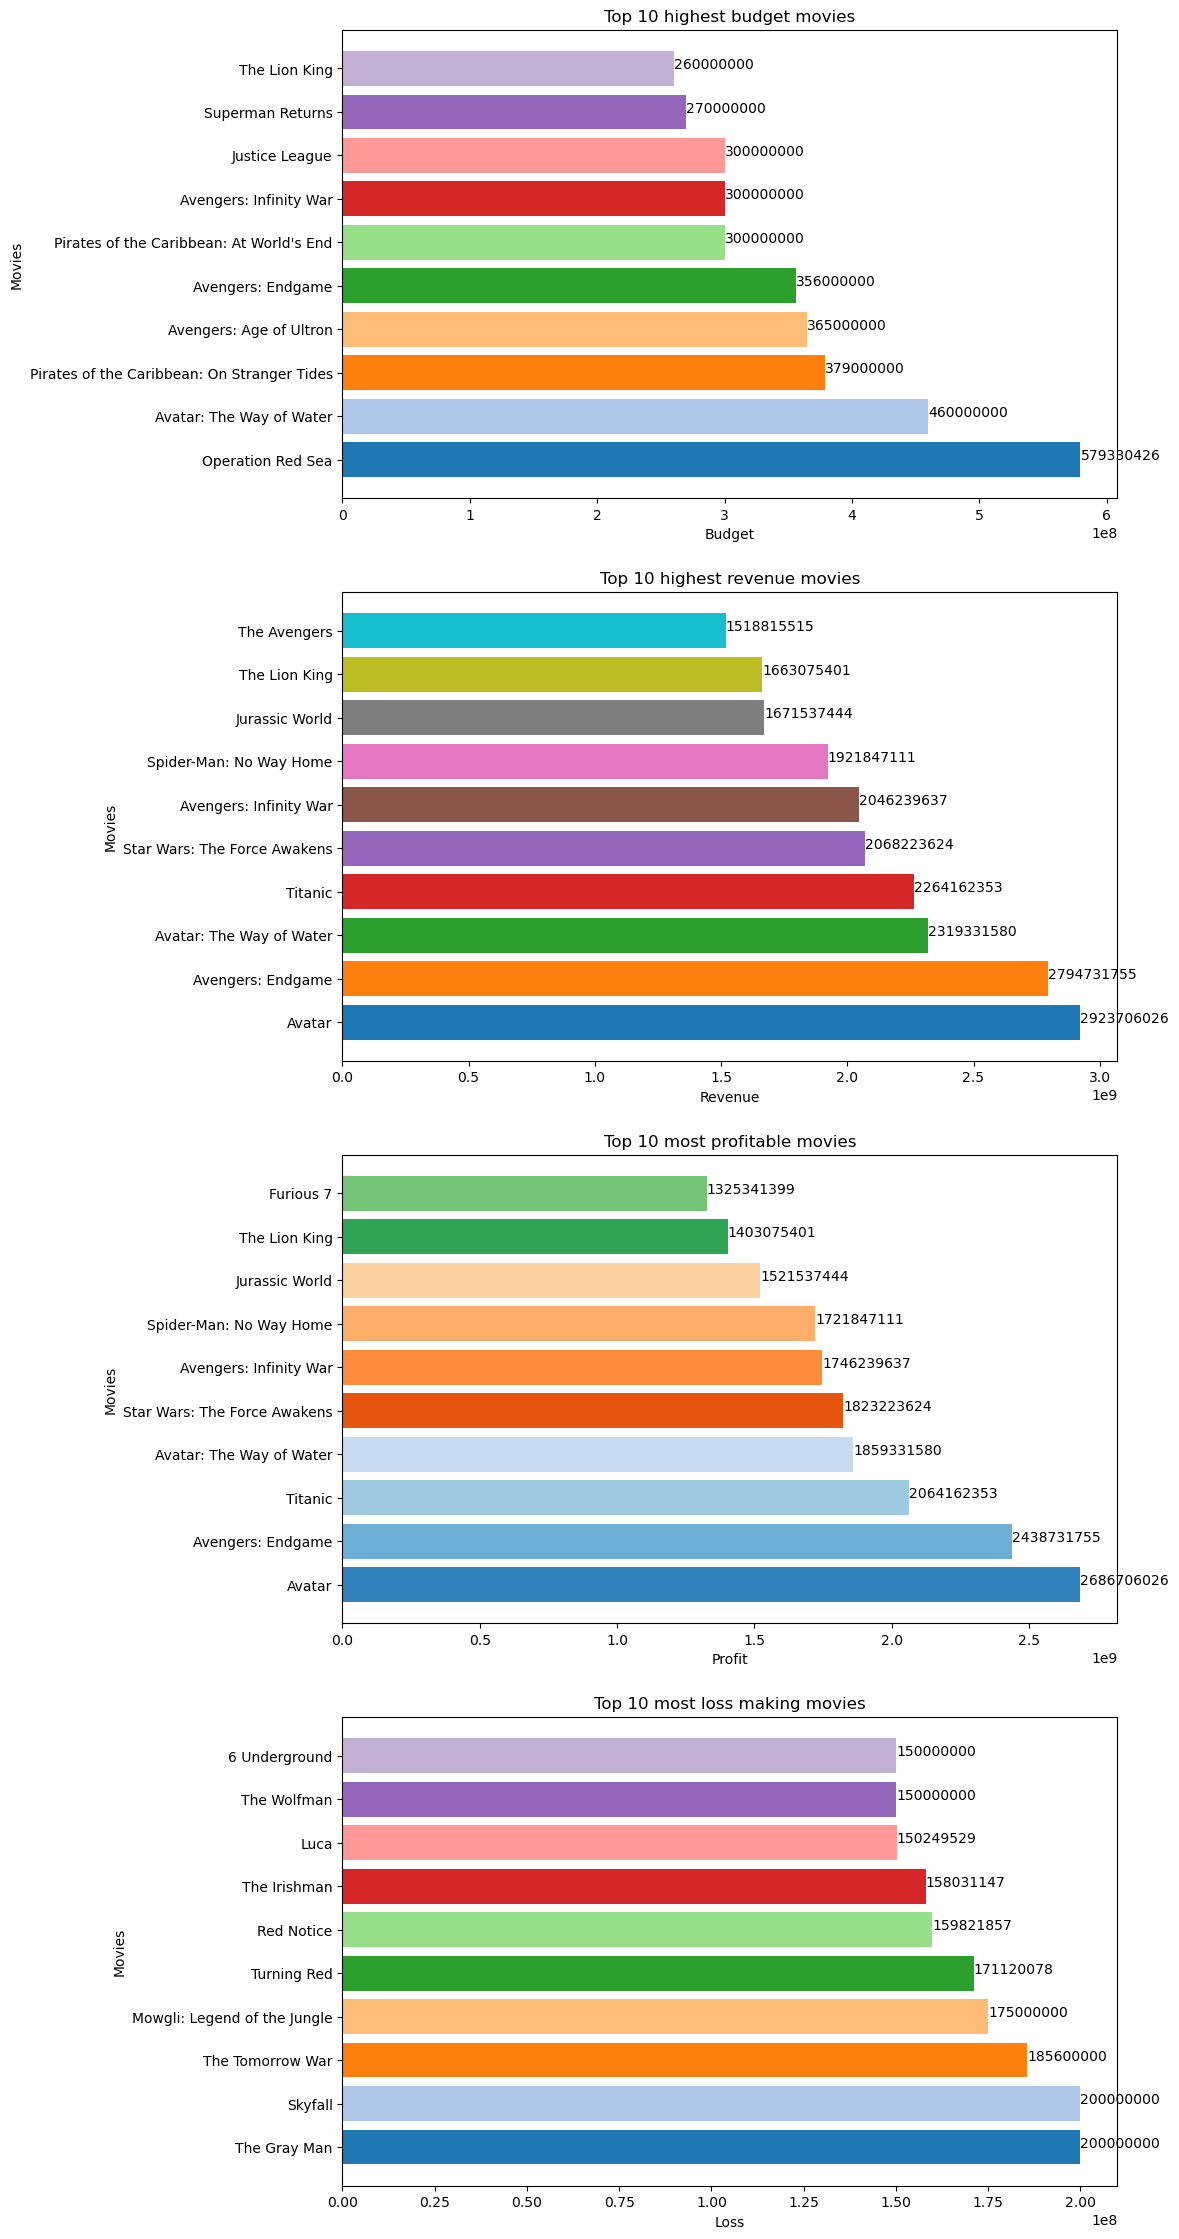

In [33]:
fig, axs = plt.subplots(4,1,figsize=(10,28))

col_map = plt.get_cmap('tab20')
axs[0].barh(max_budget['title'], max_budget['budget'], color=col_map.colors)
axs[0].set_title('Top 10 highest budget movies')
axs[0].set_xlabel('Budget')
axs[0].set_ylabel('Movies')
for i in range(len(max_budget)):
    axs[0].text(max_budget['budget'].iloc[i], max_budget['title'].iloc[i], max_budget['budget'].iloc[i])

col_map = plt.get_cmap('tab10')
axs[1].barh(max_revenue['title'], max_revenue['revenue'], color=col_map.colors)
axs[1].set_title('Top 10 highest revenue movies')
axs[1].set_xlabel('Revenue')
axs[1].set_ylabel('Movies')
for i in range(len(max_revenue)):
    axs[1].text(max_revenue['revenue'].iloc[i], max_revenue['title'].iloc[i], max_revenue['revenue'].iloc[i])

col_map = plt.get_cmap('tab20c')
axs[2].barh(max_profit['title'], max_profit['profit'], color=col_map.colors)
axs[2].set_title('Top 10 most profitable movies')
axs[2].set_xlabel('Profit')
axs[2].set_ylabel('Movies')
for i in range(len(max_profit)):
    axs[2].text(max_profit['profit'].iloc[i], max_profit['title'].iloc[i], max_profit['profit'].iloc[i])
    
col_map = plt.get_cmap('tab20')
axs[3].barh(max_loss['title'], max_loss['loss'], color=col_map.colors)
axs[3].set_title('Top 10 most loss making movies')
axs[3].set_xlabel('Loss')
axs[3].set_ylabel('Movies')
for i in range(len(max_loss)):
    axs[3].text(max_loss['loss'].iloc[i], max_loss['title'].iloc[i], max_loss['loss'].iloc[i])

plt.show()

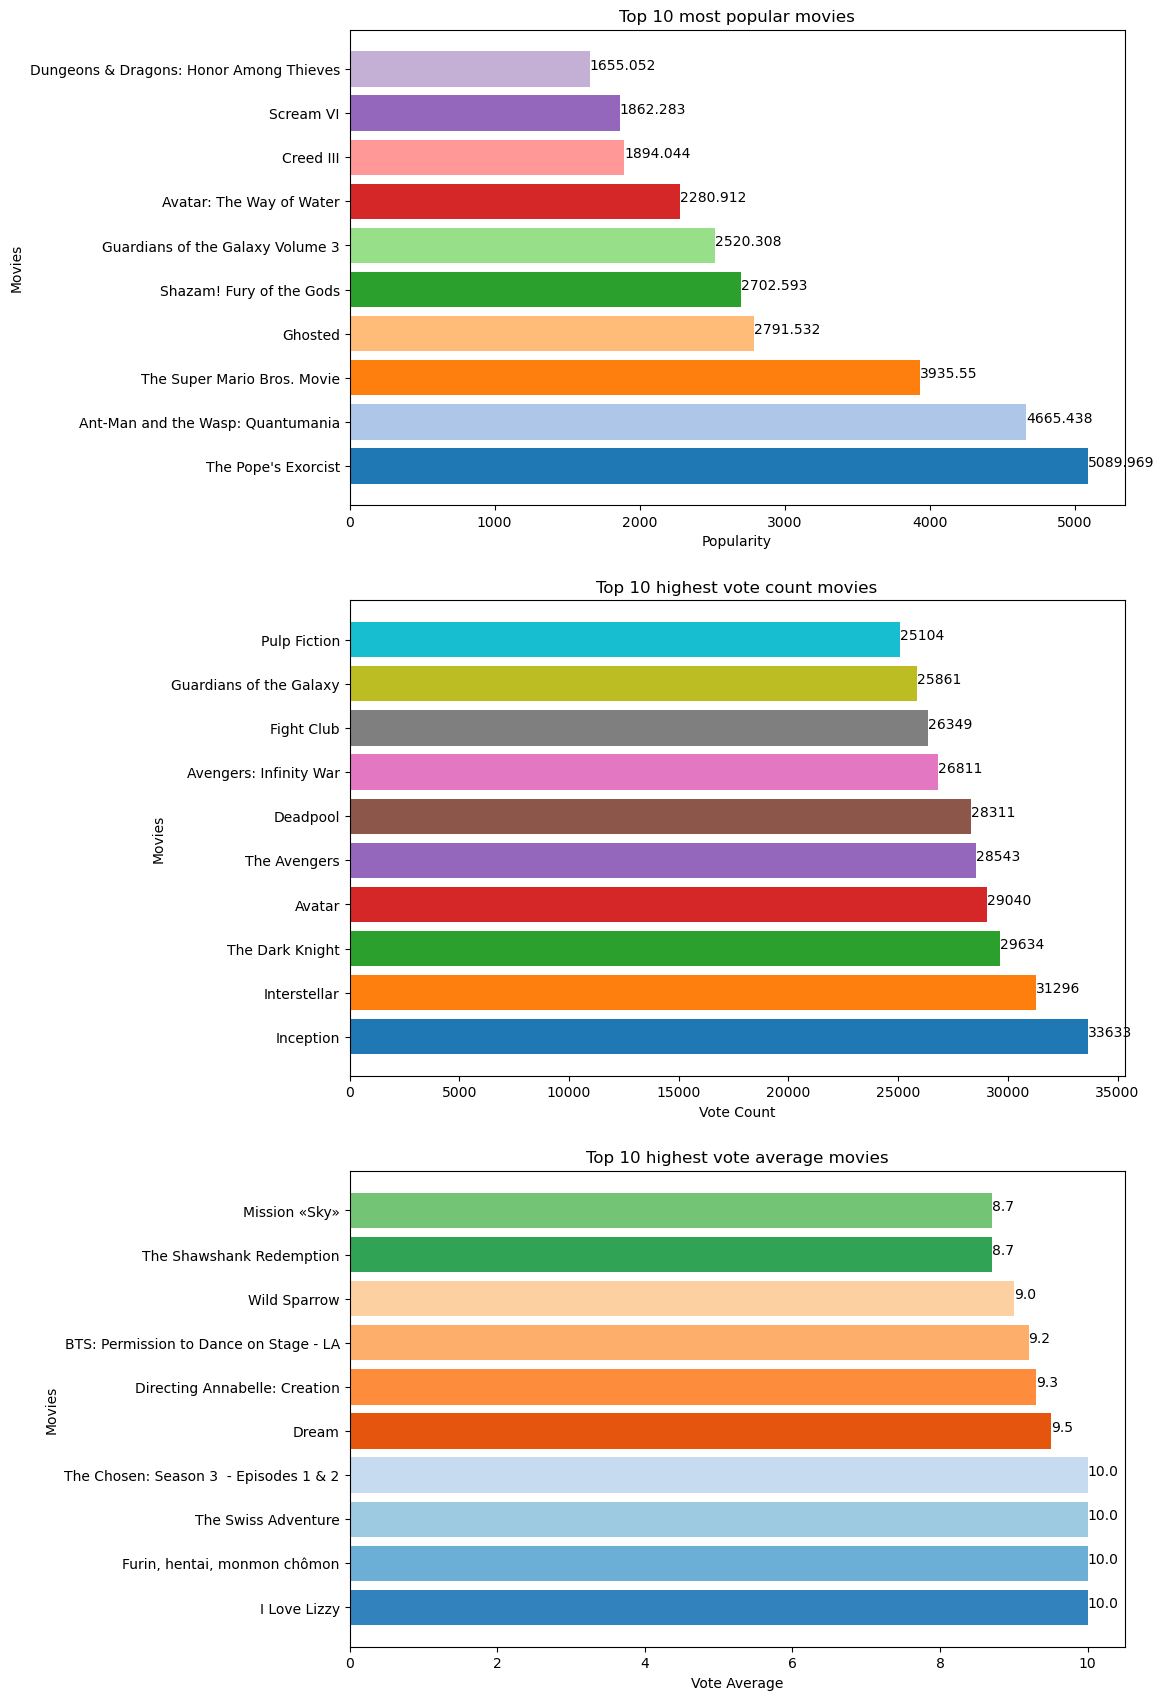

In [34]:
fig, axs = plt.subplots(3,1,figsize=(10,21))

col_map = plt.get_cmap('tab20')
axs[0].barh(max_popularity['title'], max_popularity['popularity'], color=col_map.colors)
axs[0].set_title('Top 10 most popular movies')
axs[0].set_xlabel('Popularity')
axs[0].set_ylabel('Movies')
for i in range(len(max_popularity)):
    axs[0].text(max_popularity['popularity'].iloc[i], max_popularity['title'].iloc[i], max_popularity['popularity'].iloc[i])

col_map = plt.get_cmap('tab10')
axs[1].barh(max_vc['title'], max_vc['vote_count'], color=col_map.colors)
axs[1].set_title('Top 10 highest vote count movies')
axs[1].set_xlabel('Vote Count')
axs[1].set_ylabel('Movies')
for i in range(len(max_vc)):
    axs[1].text(max_vc['vote_count'].iloc[i], max_vc['title'].iloc[i], max_vc['vote_count'].iloc[i])

col_map = plt.get_cmap('tab20c')
axs[2].barh(max_va['title'], max_va['vote_average'], color=col_map.colors)
axs[2].set_title('Top 10 highest vote average movies')
axs[2].set_xlabel('Vote Average')
axs[2].set_ylabel('Movies')
for i in range(len(max_va)):
    axs[2].text(max_va['vote_average'].iloc[i], max_va['title'].iloc[i], max_va['vote_average'].iloc[i])

plt.show()

### Count of Movies wrt Language in Dataset

In [35]:
df['original_language'].value_counts()

English             6962
Japanese             648
Spanish              289
French               283
Korean               182
Italian              143
cn                   119
Chinese              108
German                78
Russian               65
Tagalog               35
Hindi                 33
Norwegian             31
Danish                30
Polish                26
Portuguese            24
Thai                  23
Swedish               23
Dutch                 22
Indonesian            16
Turkish               14
Tamil                  8
Telugu                 7
Finnish                6
Greek                  4
Romanian               4
Ukrainian              4
Arabic                 3
Basque                 3
Hungarian              3
Persian                3
Galician               2
Khmer                  2
Kannada                2
Czech                  2
Malayalam              2
Serbian                2
Hebrew                 2
Catalan                2
Icelandic              2


### No. of all unique genres in Dataset

In [36]:
genres_col = df['genres']
# Empty set to store unique genres
unique_genres = set()
# Iterate over each row in the genres column
for genres_list in genres_col:
    genres = eval(genres_list)  # Convert the string representation of list to a list
    unique_genres.update(genres)  # Add the genres to the set
    
len(unique_genres)

19

### 5 Most Popular Movies of Every Genre

In [37]:
for genre in unique_genres:
    movies = df[df['genres'].str.contains(genre)].sort_values('popularity', ascending=False).head(5)
    movie_title = movies['title']
    print(genre)
    for i, title in enumerate(movie_title):
        print(i+1, title)
    print('\n')

Crime
1 AKA
2 John Wick: Chapter 4
3 Murder Mystery 2
4 Cocaine Bear
5 Kill Boksoon


Romance
1 Ghosted
2 Shotgun Wedding
3 The Quintessential Quintuplets Movie
4 Unhappily Ever After
5 The Forbidden Legend: Sex & Chopsticks 2


Mystery
1 The Pope's Exorcist
2 Scream VI
3 Clock
4 Invitation to a Murder
5 Batman: The Doom That Came to Gotham


Comedy
1 The Super Mario Bros. Movie
2 Ghosted
3 Shazam! Fury of the Gods
4 Dungeons & Dragons: Honor Among Thieves
5 Puss in Boots: The Last Wish


Horror
1 The Pope's Exorcist
2 Scream VI
3 Evil Dead Rise
4 The Communion Girl
5 Winnie the Pooh: Blood and Honey


Drama
1 Creed III
2 The Last Kingdom: Seven Kings Must Die
3 Puss in Boots: The Last Wish
4 The Park
5 Marcel the Shell with Shoes On


Adventure
1 Ant-Man and the Wasp: Quantumania
2 The Super Mario Bros. Movie
3 Shazam! Fury of the Gods
4 Guardians of the Galaxy Volume 3
5 Avatar: The Way of Water


Action
1 Ant-Man and the Wasp: Quantumania
2 Ghosted
3 Shazam! Fury of the Gods
4 Guard

### 5 Most Profitable Movies of Every Genre

In [38]:
for genre in unique_genres:
    movies = df[df['genres'].str.contains(genre)].sort_values('profit', ascending=False).head(5)
    movie_title = movies['title']
    print(genre)
    for i ,title in enumerate(movie_title):
        print(i+1, title)
    print('\n')

Crime
1 Furious 7
2 Joker
3 The Fate of the Furious
4 The Dark Knight Rises
5 The Dark Knight


Romance
1 Titanic
2 Beauty and the Beast
3 Aladdin
4 Shrek 2
5 The Twilight Saga: Breaking Dawn - Part 2


Mystery
1 Harry Potter and the Order of the Phoenix
2 Full River Red
3 The Da Vinci Code
4 The Sixth Sense
5 The Batman


Comedy
1 Frozen II
2 Minions
3 The Super Mario Bros. Movie
4 Despicable Me 3
5 Jumanji: Welcome to the Jungle


Horror
1 It
2 Jaws
3 The Exorcist
4 It Chapter Two
5 The Meg


Drama
1 Titanic
2 The Lion King
3 Top Gun: Maverick
4 Joker
5 Bohemian Rhapsody


Adventure
1 Avatar
2 Avengers: Endgame
3 Avatar: The Way of Water
4 Star Wars: The Force Awakens
5 Avengers: Infinity War


Action
1 Avatar
2 Avengers: Endgame
3 Avatar: The Way of Water
4 Star Wars: The Force Awakens
5 Avengers: Infinity War


TV Movie
1 High School Musical 2
2 A Year-End Medley
3 Stargate: The Ark of Truth
4 Teen Wolf: The Movie
5 Under the Sea: A Descendants Story


Family
1 The Lion King
2 Froz

### Top 5 production companies with maximum movie count

In [39]:
companies_column = df['production_companies']

# Create an empty dictionary to store company names and their movie counts
company_counts = {}

# Iterate over each row in the companies column
for companies_list in companies_column:
    companies = eval(companies_list)  # Convert the string representation of list to a list
    for company in companies:
        if company in company_counts:
            company_counts[company] += 1  # Increment the movie count
        else:
            company_counts[company] = 1  # Add the company with initial movie count

sorted_companies = sorted(company_counts.items(), key=lambda x: x[1], reverse=True)

top_5_companies = sorted_companies[:5]

for company, count in top_5_companies:
    print(company, ': ', count)

Warner Bros. Pictures :  488
Universal Pictures :  470
Paramount :  374
Columbia Pictures :  360
20th Century Fox :  348


### Most popular movie in every 5 years with their popularity

In [40]:
# Convert the release_date column to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Create a new column for the release half_decade
df['release_hd'] = (df['release_date'].dt.year // 5) * 5

popular_movies = df.groupby('release_hd').apply(lambda x: x.nlargest(1, 'popularity')) # 1 is for no. of rows we want in every decade

for i, r in popular_movies.iterrows():
    print(f"Year: {r['release_hd']}-{r['release_hd']+4}")
    print("Movie:", r['title'])
    print("Popularity:", r['popularity'])
    print("\n")

Year: 1900-1904
Movie: A Trip to the Moon
Popularity: 14.584


Year: 1920-1924
Movie: Nosferatu
Popularity: 18.37


Year: 1925-1929
Movie: Metropolis
Popularity: 17.496


Year: 1930-1934
Movie: Baby Face
Popularity: 35.37


Year: 1935-1939
Movie: Snow White and the Seven Dwarfs
Popularity: 61.616


Year: 1940-1944
Movie: Bambi
Popularity: 43.576


Year: 1945-1949
Movie: Samson and Delilah
Popularity: 27.865


Year: 1950-1954
Movie: Cinderella
Popularity: 73.639


Year: 1955-1959
Movie: Sleeping Beauty
Popularity: 37.958


Year: 1960-1964
Movie: One Hundred and One Dalmatians
Popularity: 47.549


Year: 1965-1969
Movie: The Jungle Book
Popularity: 52.291


Year: 1970-1974
Movie: The Godfather
Popularity: 113.216


Year: 1975-1979
Movie: Star Wars
Popularity: 90.988


Year: 1980-1984
Movie: Oscenità
Popularity: 129.957


Year: 1985-1989
Movie: The Little Mermaid
Popularity: 104.76


Year: 1990-1994
Movie: Super Mario Bros.
Popularity: 124.391


Year: 1995-1999
Movie: Titanic
Popularity: 1

### Average Popularity by Year

In [41]:
df['year'] = df['release_date'].dt.year
avg_pop = df.groupby('year')['popularity'].mean()

### Visualization of Categories by Year

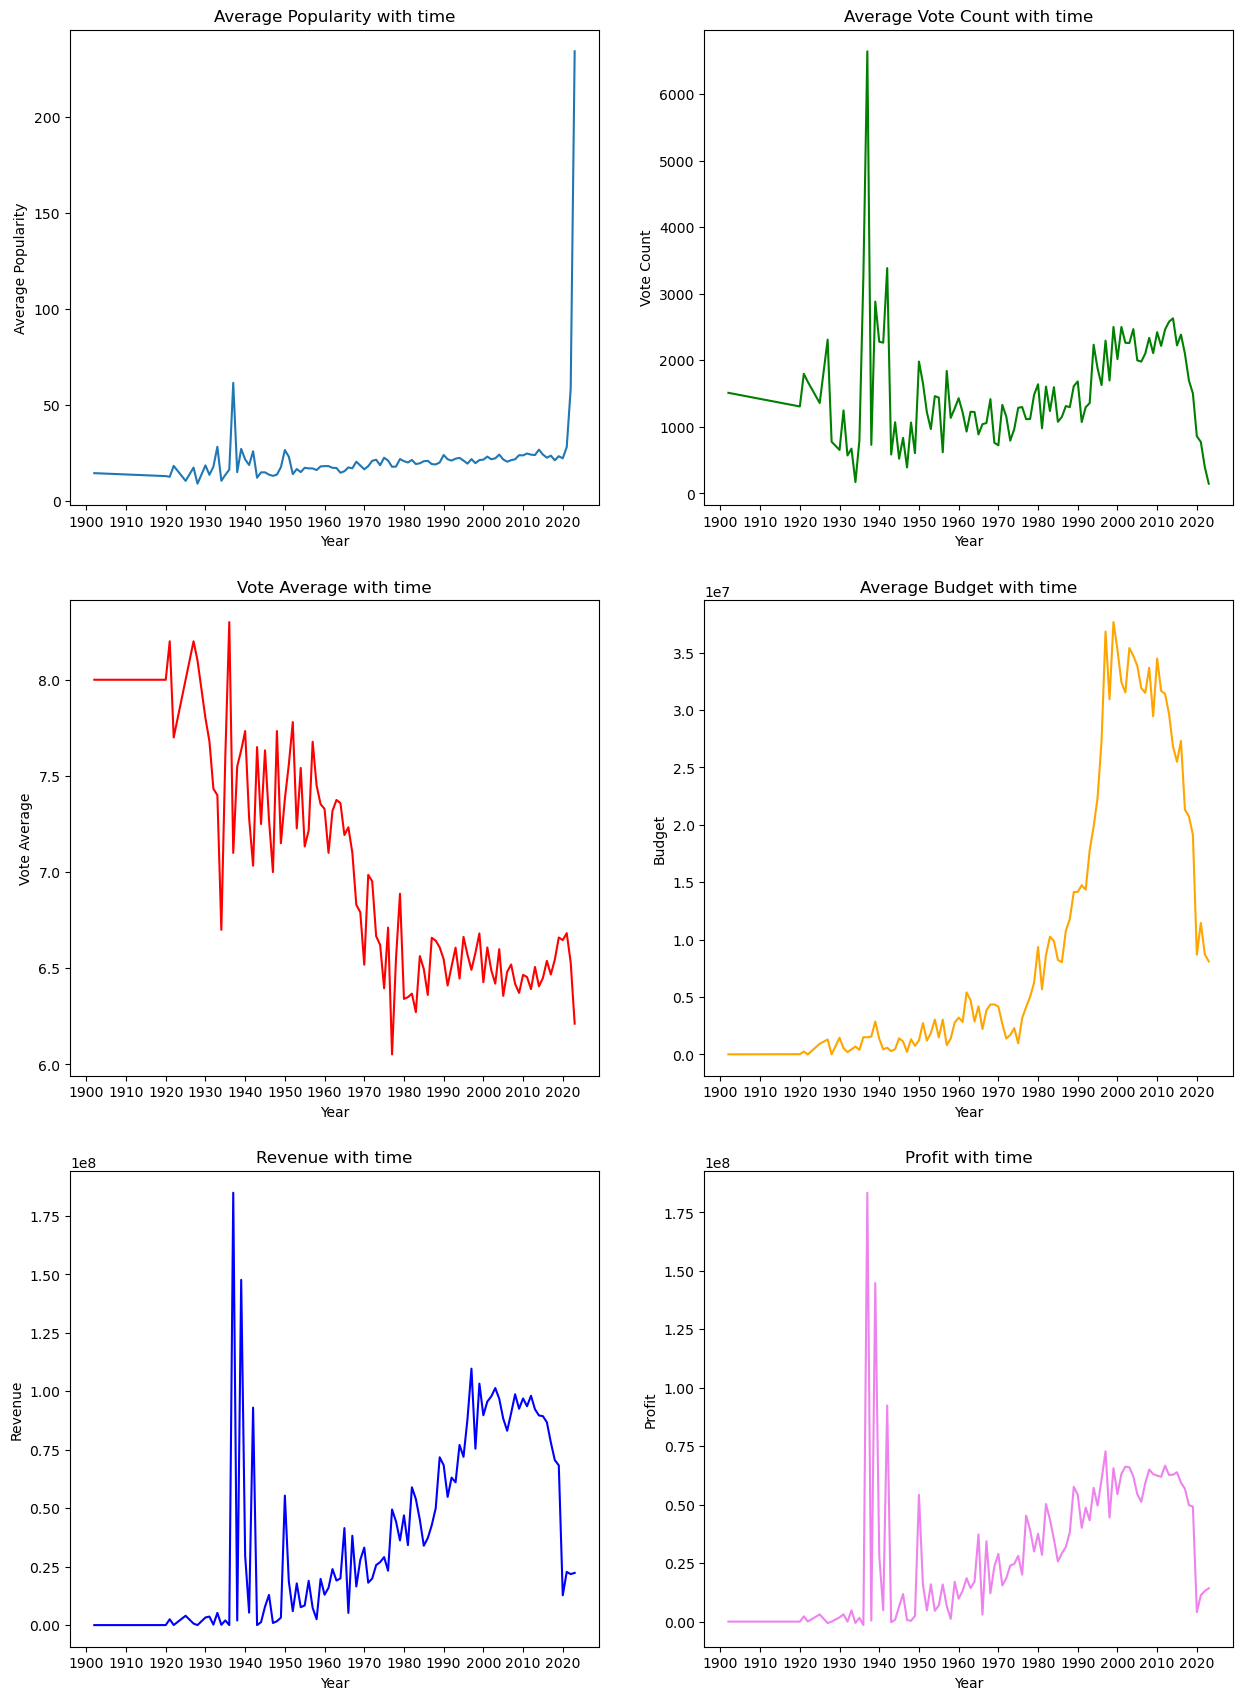

In [42]:
fig, axs = plt.subplots(3,2,figsize=(15,21))

axs[0,0].plot(avg_pop.index, avg_pop.values)
axs[0,0].set_title('Average Popularity with time')
axs[0,0].set_xlabel('Year')
axs[0,0].set_ylabel('Average Popularity')
axs[0,0].set_xticks(np.arange(1900, 2030, step=10),rotation=45)

axs[0,1].plot(df.groupby('year')['vote_count'].mean(),color='green')
axs[0,1].set_title('Average Vote Count with time')
axs[0,1].set_xlabel('Year')
axs[0,1].set_ylabel('Vote Count')
axs[0,1].set_xticks(np.arange(1900, 2030, step=10),rotation=45)

axs[1,0].plot(df.groupby('year')['vote_average'].mean(),color='red')
axs[1,0].set_title('Vote Average with time')
axs[1,0].set_xlabel('Year')
axs[1,0].set_ylabel('Vote Average')
axs[1,0].set_xticks(np.arange(1900, 2030, step=10),rotation=45)

axs[1,1].plot(df.groupby('year')['budget'].mean(), color='orange')
axs[1,1].set_title('Average Budget with time')
axs[1,1].set_xlabel('Year')
axs[1,1].set_ylabel('Budget')
axs[1,1].set_xticks(np.arange(1900, 2030, step=10),rotation=45)

axs[2,0].plot(df.groupby('year')['revenue'].mean(),color='blue')
axs[2,0].set_title('Revenue with time')
axs[2,0].set_xlabel('Year')
axs[2,0].set_ylabel('Revenue')
axs[2,0].set_xticks(np.arange(1900, 2030, step=10),rotation=45)

axs[2,1].plot(df.groupby('year')['profit'].mean(), color='violet')
axs[2,1].set_title('Profit with time')
axs[2,1].set_xlabel('Year')
axs[2,1].set_ylabel('Profit')
axs[2,1].set_xticks(np.arange(1900, 2030, step=10),rotation=45)

plt.show()

### Movie Count with time

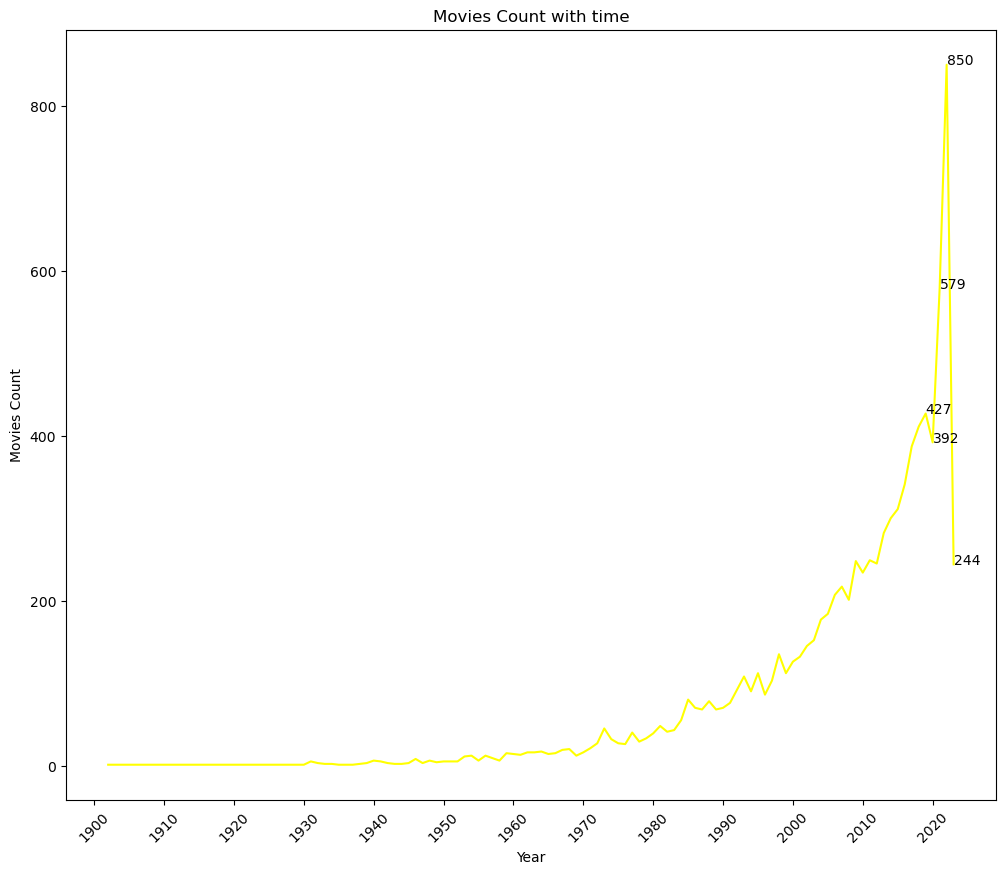

In [43]:
movie_count = df['year'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(12,10))
plt.plot(movie_count, color='yellow')
plt.title('Movies Count with time')
plt.xlabel('Year')
plt.ylabel('Movies Count')
plt.xticks(np.arange(1900, 2030, step=10),rotation=45)
for i in range(5):
    ax.text(movie_count.index[-5+i], movie_count.values[-5+i], movie_count.values[-5+i])
plt.show()

### Visualization of Rise and Drop of Popularity with different genres over the time

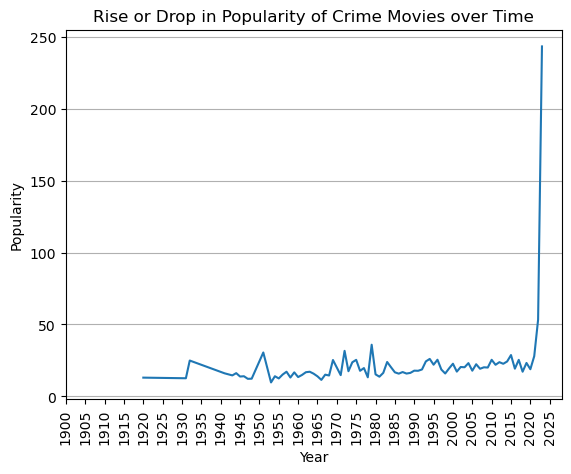

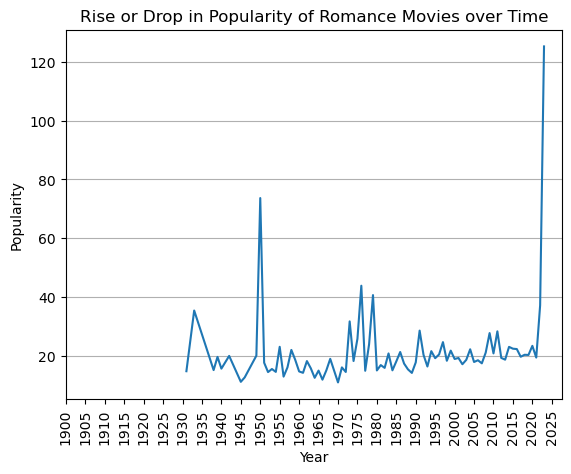

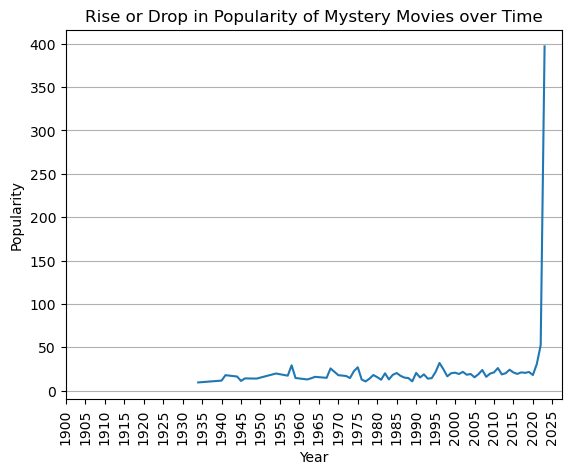

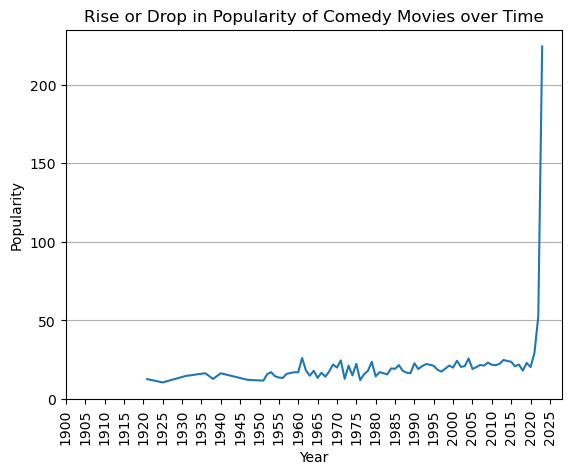

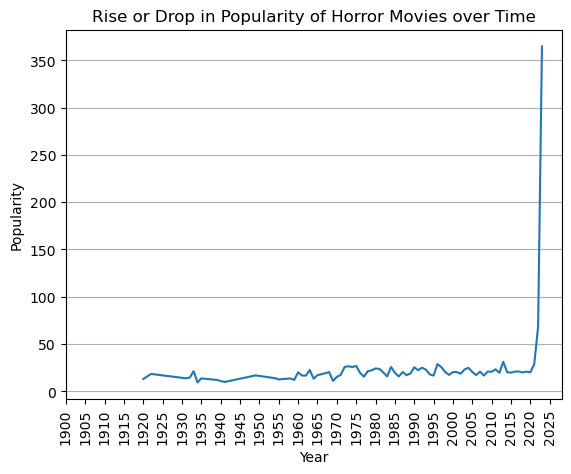

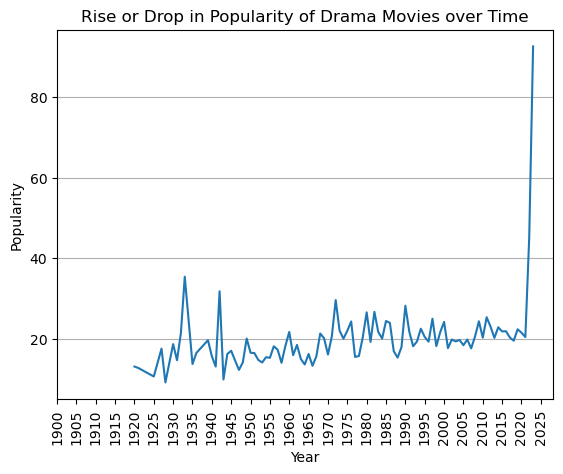

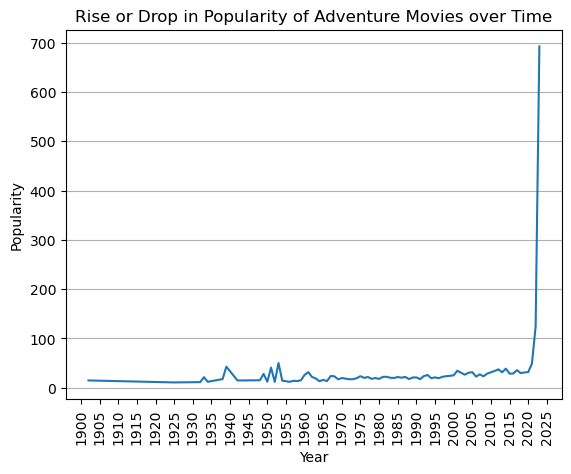

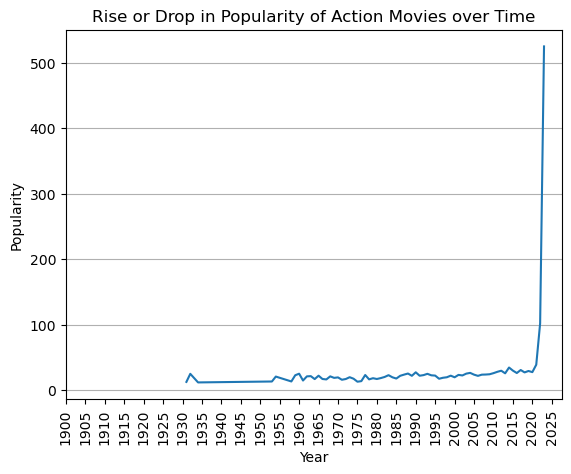

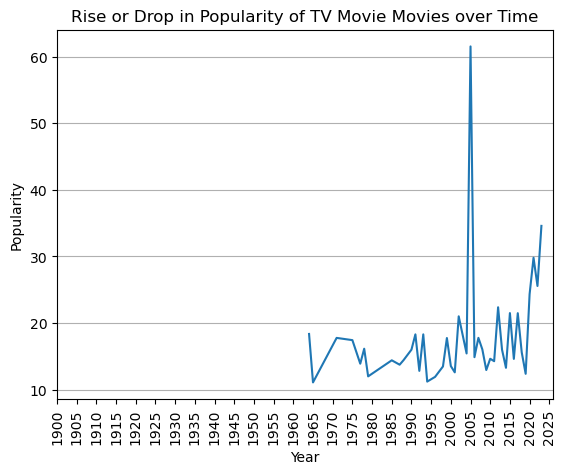

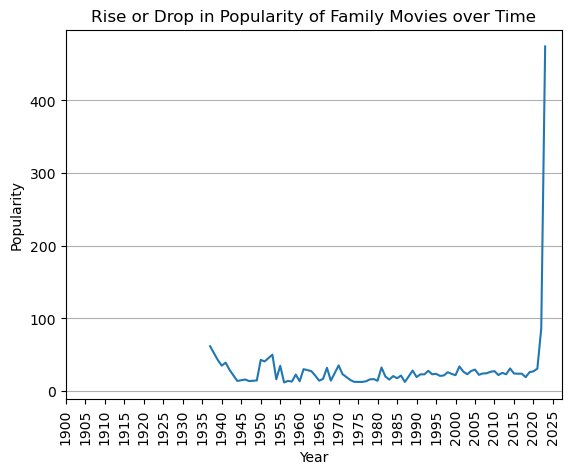

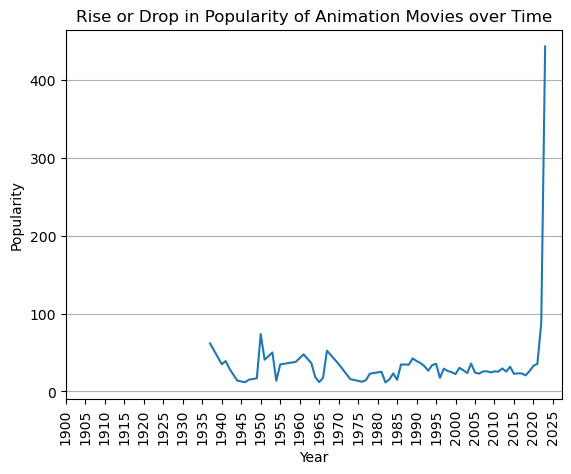

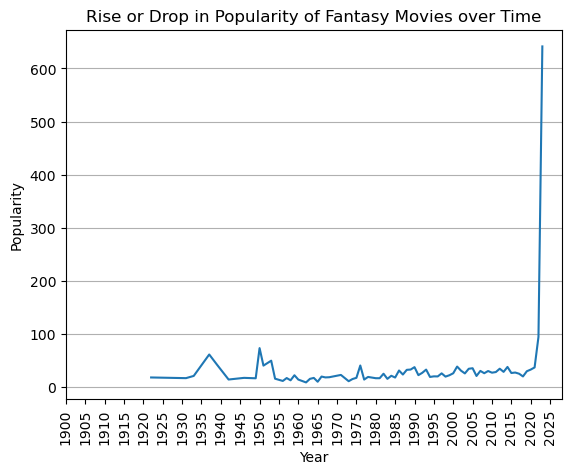

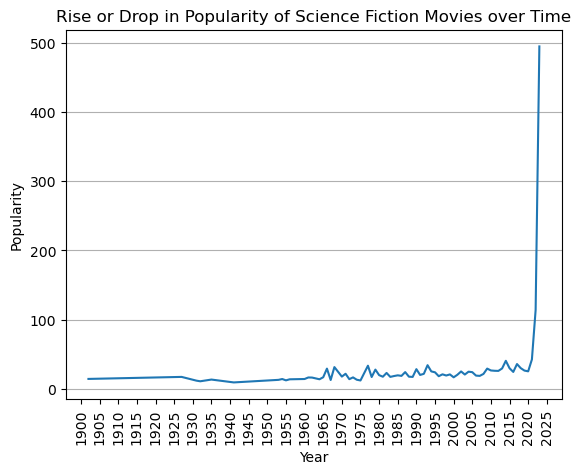

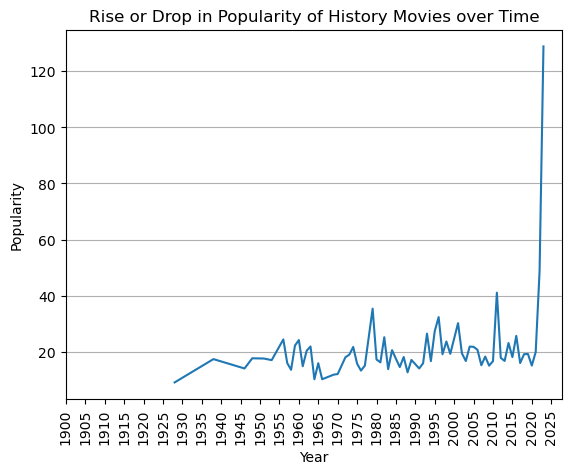

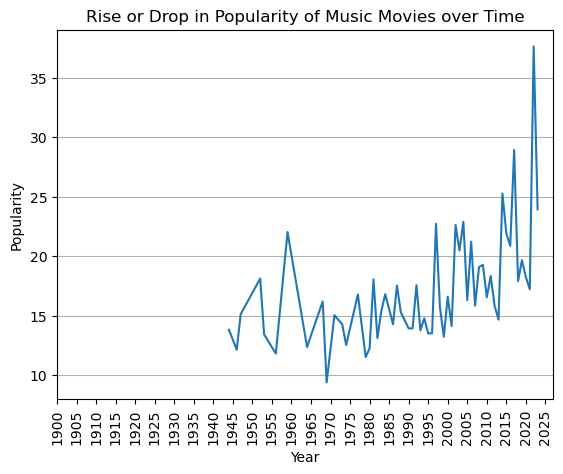

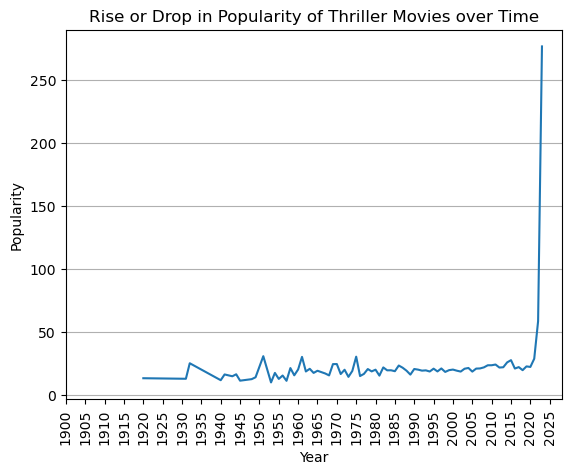

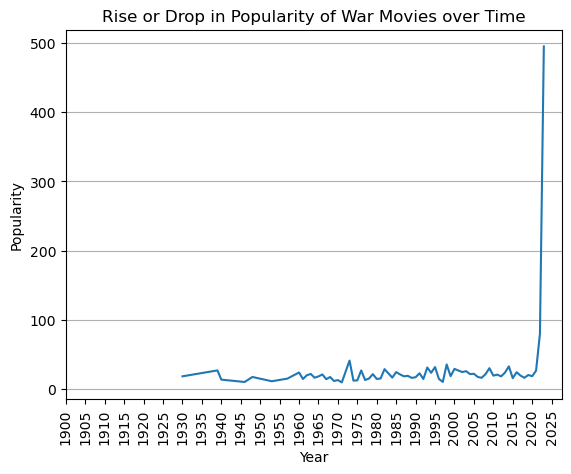

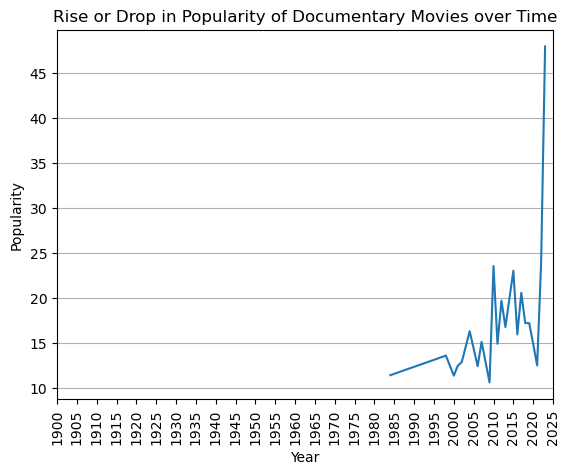

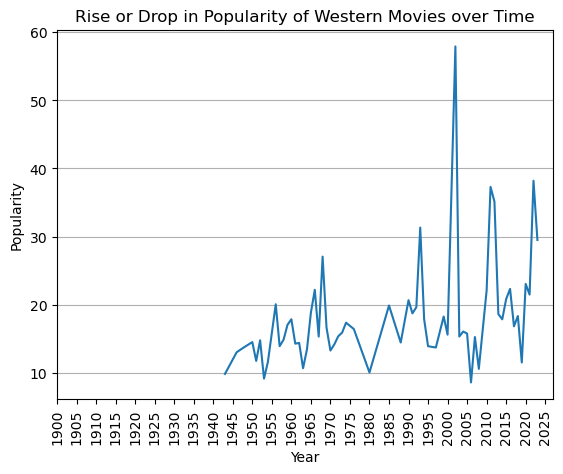

In [44]:
for genre in unique_genres:
    movies = df[df['genres'].str.contains(genre)]
    avg_popularity = movies.groupby('year')['popularity'].mean()
    plt.plot(avg_popularity.index, avg_popularity.values)
    plt.title('Rise or Drop in Popularity of '+str(genre)+' Movies over Time')
    plt.xlabel('Year')
    plt.ylabel('Popularity')
    plt.xticks(np.arange(1900, 2030, step=5),rotation=90)
    plt.grid(axis='y')
    plt.show()

### Visualization of Rise and Drop of Popularity with different languages over the time

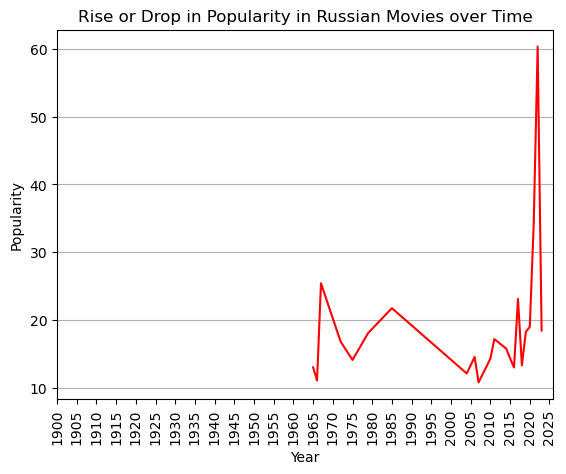

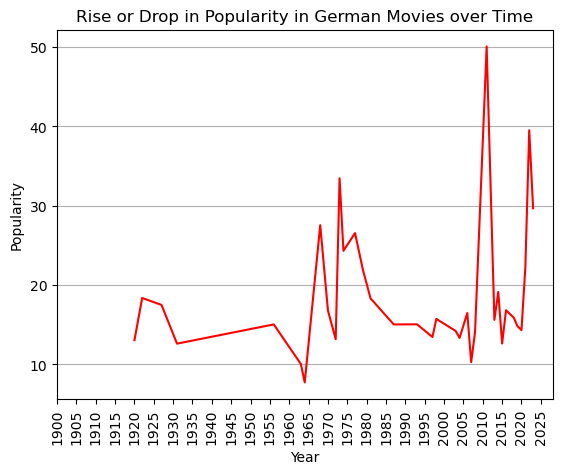

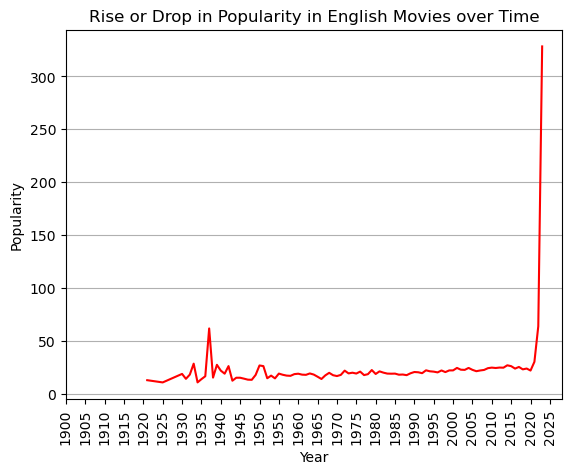

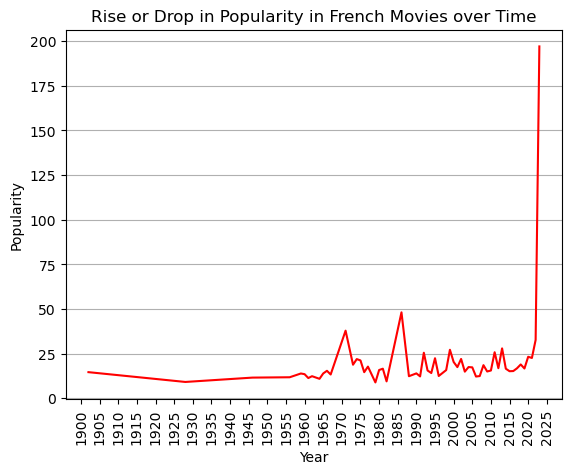

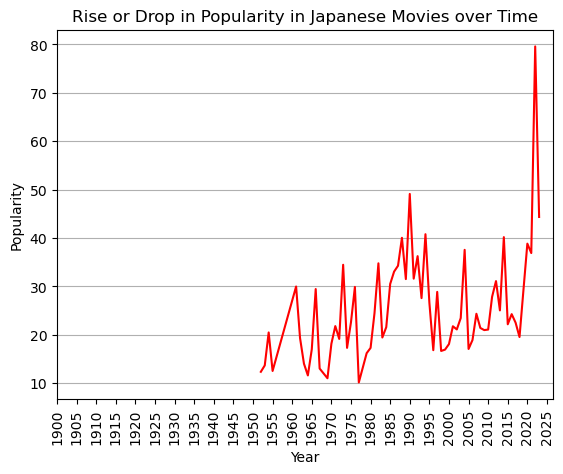

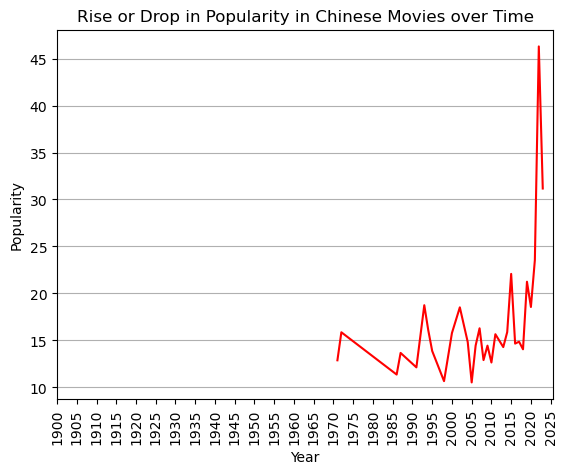

In [45]:
unique_lang = {"English","Japanese","French","Chinese","German","Russian"}
   
for language in unique_lang:
    movies = df[df['original_language'].str.contains(language)]
    avg_popularity = movies.groupby('year')['popularity'].mean()
    plt.plot(avg_popularity.index, avg_popularity.values, color='red')
    plt.title('Rise or Drop in Popularity in '+str(language)+' Movies over Time')
    plt.xlabel('Year')
    plt.ylabel('Popularity')
    plt.xticks(np.arange(1900, 2030, step=5),rotation=90)
    plt.grid(axis='y')
    plt.show()